### **Imports**

In [2]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.feature_selection import chi2
from sko.PSO import PSO
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import ttest_rel
from statistics import mean, stdev
import shap
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

### **Data Ingestion**

In [3]:
# Carregamento de Dados
test = pd.read_csv(r'../datasets/test_data.csv', encoding='latin1')
train = pd.read_csv(r'../datasets/training_data.csv', encoding='latin1')

### **Data Preparation**

#### **Univariate**

##### **Unique Values**

In [4]:
train.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

In [5]:
#Como temos apenas 1 valor unico na coluna city_name e AVERAGE_PRECIPITATION, podemos removê-las do dataset
train = train.drop(['city_name', 'AVERAGE_PRECIPITATION'], axis=1)
test = test.drop(['city_name', 'AVERAGE_PRECIPITATION'], axis=1)

##### **Average Speed Diff**

In [6]:
train['AVERAGE_SPEED_DIFF'].value_counts()

AVERAGE_SPEED_DIFF
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64

In [7]:
# Preenchimento de valores nulos 'AVERAGE_SPEED_DIFF', porque latinl-1 coloca 'None' como NaN
train['AVERAGE_SPEED_DIFF'] = train['AVERAGE_SPEED_DIFF'].fillna('None')

In [8]:
train['AVERAGE_SPEED_DIFF'] = train['AVERAGE_SPEED_DIFF'].map({'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4})

In [9]:
train['AVERAGE_SPEED_DIFF'].value_counts()

AVERAGE_SPEED_DIFF
0    2200
2    1651
1    1419
3    1063
4     479
Name: count, dtype: int64

##### **Average Free Flow Speed**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\2045838774.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


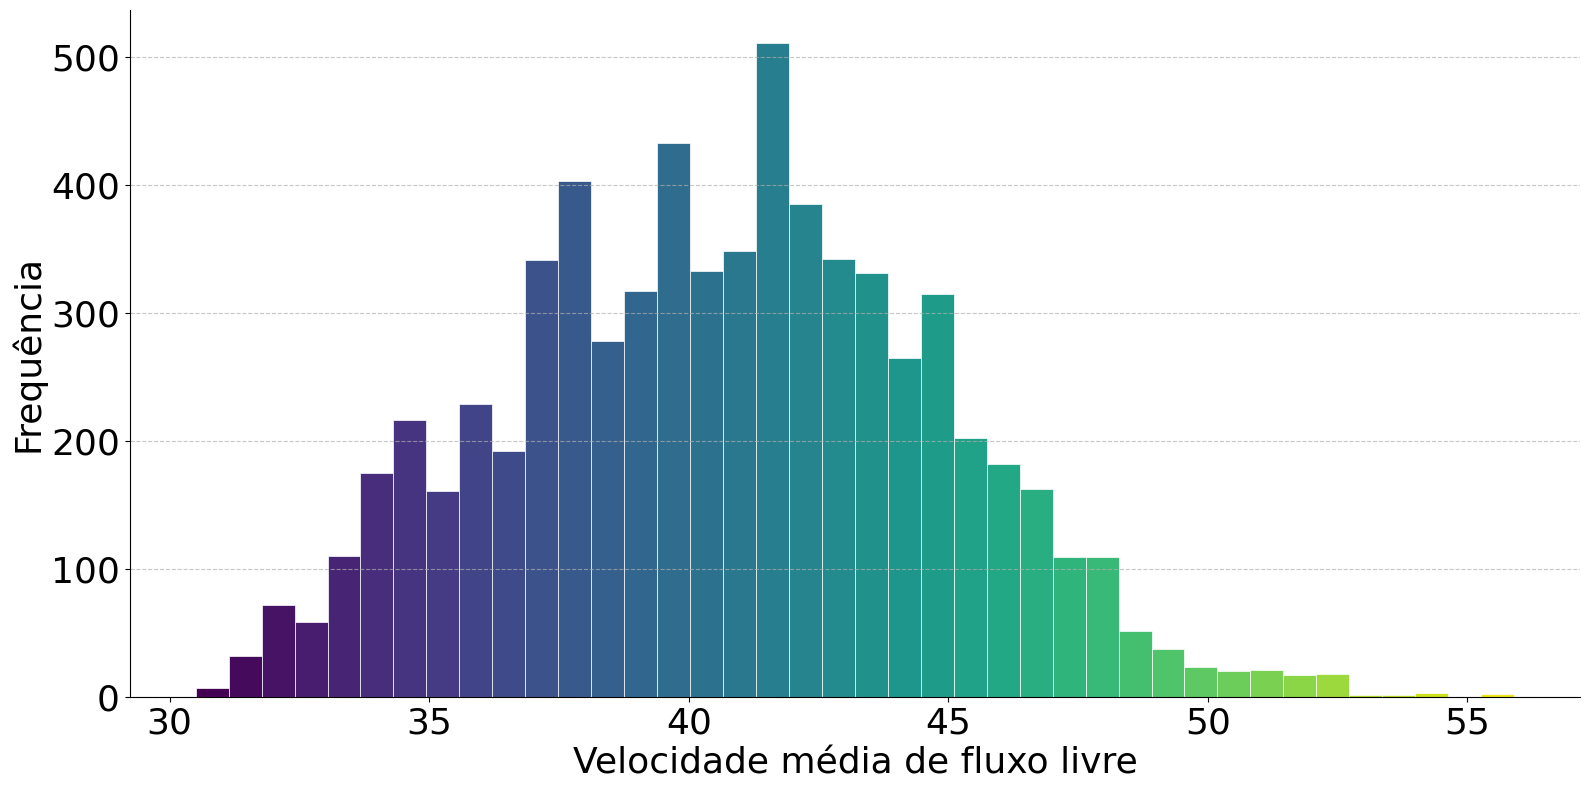

In [10]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_FREE_FLOW_SPEED', data=train, bins=40)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Velocidade média de fluxo livre', size=26)
plt.ylabel('Frequência', size=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


In [11]:
media = train['AVERAGE_FREE_FLOW_SPEED'].mean()
mediana = train['AVERAGE_FREE_FLOW_SPEED'].median()
moda = train['AVERAGE_FREE_FLOW_SPEED'].mode()[0]
desvio_padrao = train['AVERAGE_FREE_FLOW_SPEED'].std()
variancia = train['AVERAGE_FREE_FLOW_SPEED'].var()
maximo = train['AVERAGE_FREE_FLOW_SPEED'].max()
minimo = train['AVERAGE_FREE_FLOW_SPEED'].min()
interquartil = train['AVERAGE_FREE_FLOW_SPEED'].quantile(0.75) - train['AVERAGE_FREE_FLOW_SPEED'].quantile(0.25) 
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_FREE_FLOW_SPEED'].kurtosis()
skewness = train['AVERAGE_FREE_FLOW_SPEED'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')


Média: 40.66100998238404
Mediana: 40.7
Moda: 40.0
Desvio Padrão: 4.119022842616268
Variância: 16.966349177994598
Máximo: 55.9
Mínimo: 30.5
Intervalo Interquartil: 5.899999999999999
Curtose: -0.32436675582163543
Assimetria: 0.10973130090136157


##### **Average Time Difference**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\3655246869.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


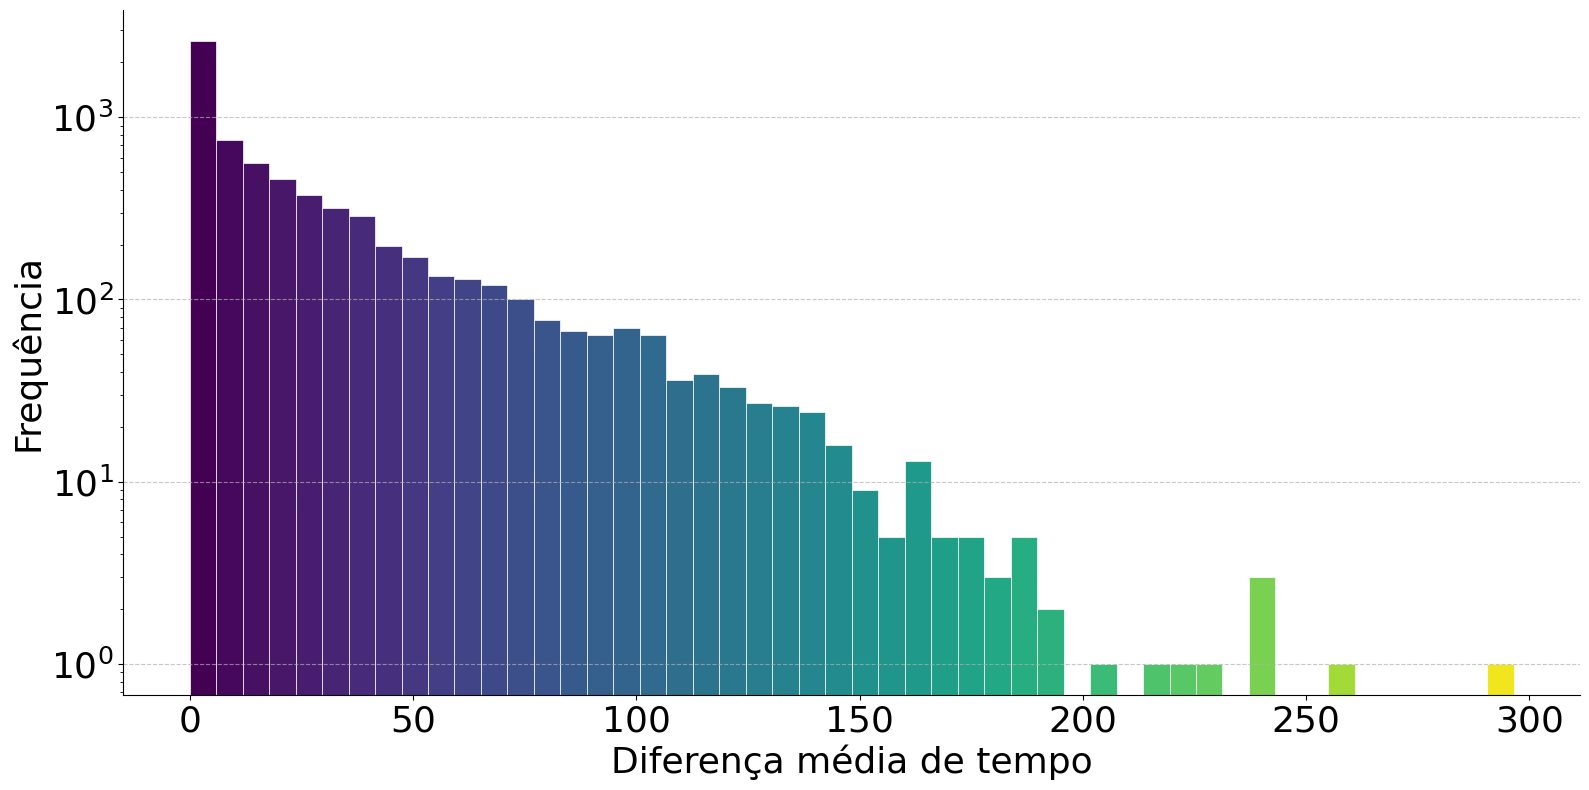

In [12]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_TIME_DIFF', data=train, bins=50)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Diferença média de tempo', size=26)
plt.ylabel('Frequência', size=26)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [13]:
media = train['AVERAGE_TIME_DIFF'].mean()
mediana = train['AVERAGE_TIME_DIFF'].median()
moda = train['AVERAGE_TIME_DIFF'].mode()[0]
desvio_padrao = train['AVERAGE_TIME_DIFF'].std()
variancia = train['AVERAGE_TIME_DIFF'].var()
maximo = train['AVERAGE_TIME_DIFF'].max()
minimo = train['AVERAGE_TIME_DIFF'].min()
interquartil = train['AVERAGE_TIME_DIFF'].quantile(0.75) - train['AVERAGE_TIME_DIFF'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_TIME_DIFF'].kurtosis()
skewness = train['AVERAGE_TIME_DIFF'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')

Média: 25.63711098062243
Mediana: 12.2
Moda: 0.0
Desvio Padrão: 33.51050652587339
Variância: 1122.9540476206028
Máximo: 296.5
Mínimo: 0.0
Intervalo Interquartil: 33.925000000000004
Curtose: 5.111165221965141
Assimetria: 2.0422071795699384


##### **Average Free Flow Time**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\1815124287.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


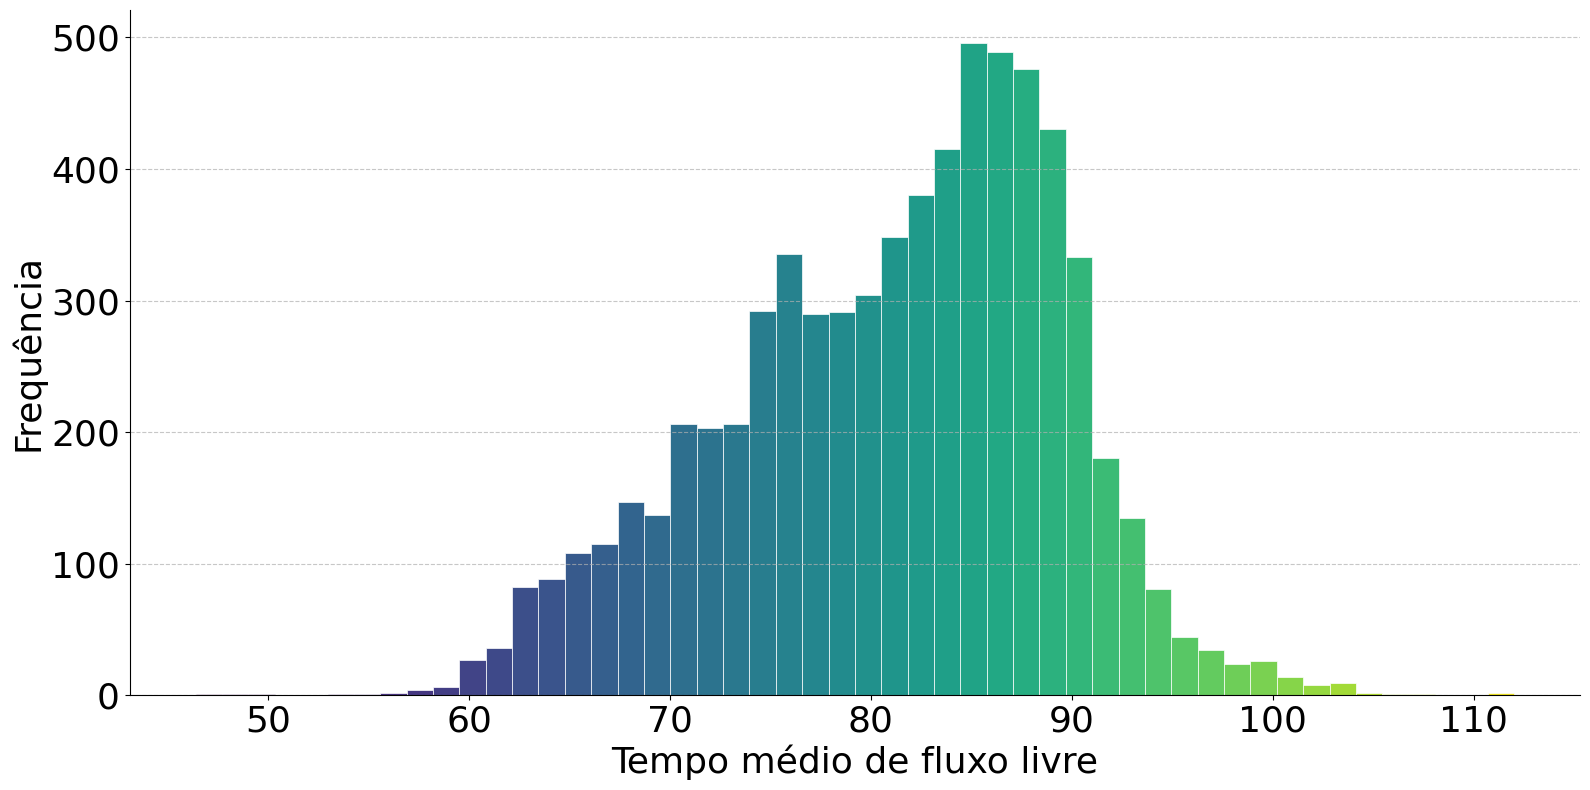

In [14]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_FREE_FLOW_TIME', data=train, bins=50)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Tempo médio de fluxo livre', size=26)
plt.ylabel('Frequência', size=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [15]:
media = train['AVERAGE_FREE_FLOW_TIME'].mean()
mediana = train['AVERAGE_FREE_FLOW_TIME'].median()
moda = train['AVERAGE_FREE_FLOW_TIME'].mode()[0]
desvio_padrao = train['AVERAGE_FREE_FLOW_TIME'].std()
variancia = train['AVERAGE_FREE_FLOW_TIME'].var()
maximo = train['AVERAGE_FREE_FLOW_TIME'].max()
minimo = train['AVERAGE_FREE_FLOW_TIME'].min()
interquartil = train['AVERAGE_FREE_FLOW_TIME'].quantile(0.75) - train['AVERAGE_FREE_FLOW_TIME'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_FREE_FLOW_TIME'].kurtosis()
skewness = train['AVERAGE_FREE_FLOW_TIME'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')


Média: 81.14395184967705
Mediana: 82.4
Moda: 87.4
Desvio Padrão: 8.29440059992433
Variância: 68.79708131202509
Máximo: 112.0
Mínimo: 46.4
Intervalo Interquartil: 12.0
Curtose: -0.20963522546324098
Assimetria: -0.3657608786050427


##### **Average Atmosphere Pressure**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\3441577823.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


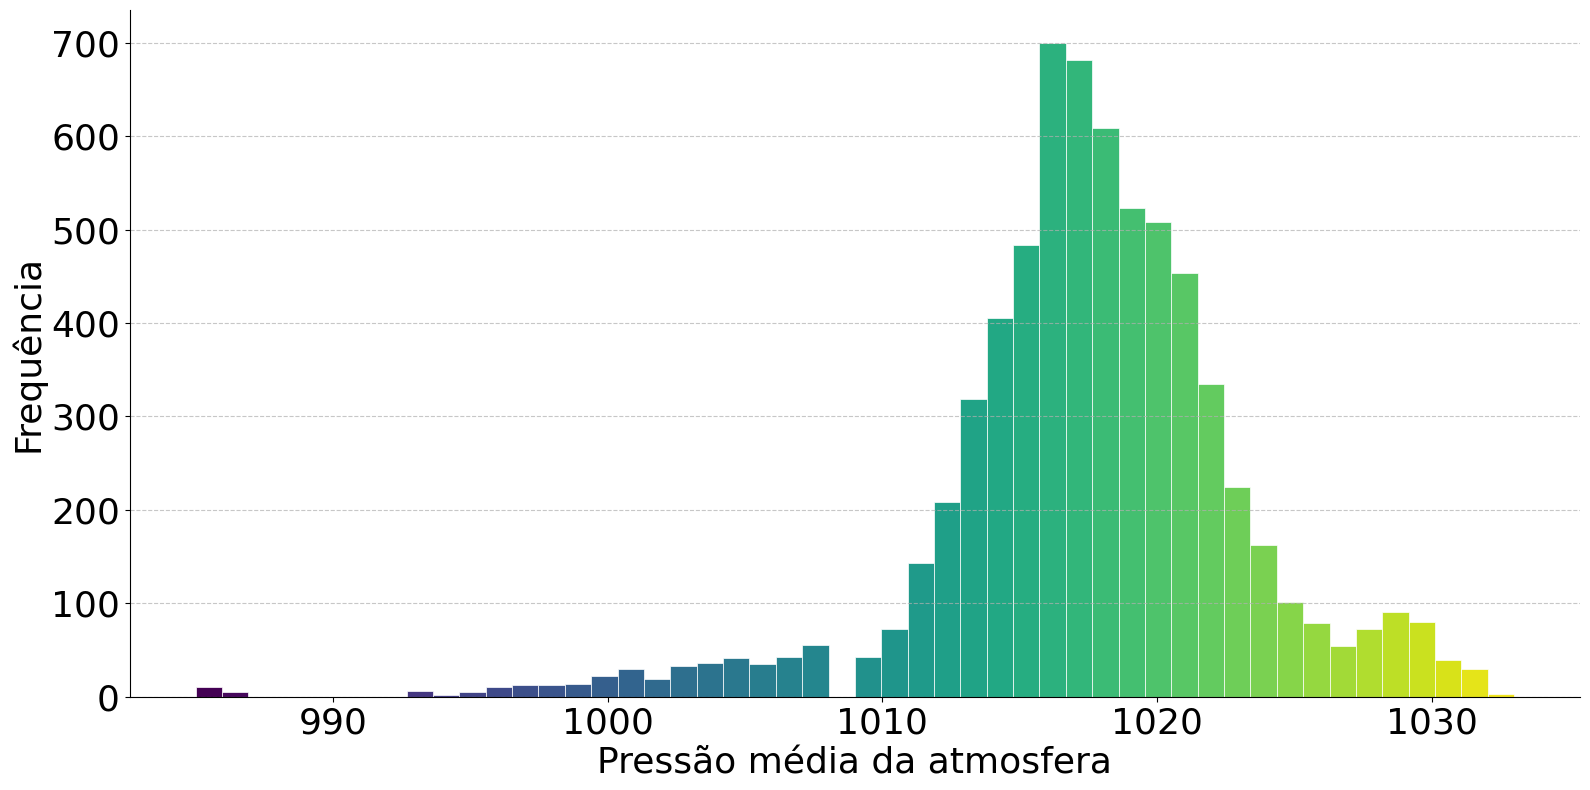

In [16]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_ATMOSP_PRESSURE', data=train, bins=50)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Pressão média da atmosfera', size=26)
plt.ylabel('Frequência', size=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
media = train['AVERAGE_ATMOSP_PRESSURE'].mean()
mediana = train['AVERAGE_ATMOSP_PRESSURE'].median()
moda = train['AVERAGE_ATMOSP_PRESSURE'].mode()[0]
desvio_padrao = train['AVERAGE_ATMOSP_PRESSURE'].std()
variancia = train['AVERAGE_ATMOSP_PRESSURE'].var()
maximo = train['AVERAGE_ATMOSP_PRESSURE'].max()
minimo = train['AVERAGE_ATMOSP_PRESSURE'].min()
interquartil = train['AVERAGE_ATMOSP_PRESSURE'].quantile(0.75) - train['AVERAGE_ATMOSP_PRESSURE'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_ATMOSP_PRESSURE'].kurtosis()
skewness = train['AVERAGE_ATMOSP_PRESSURE'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')

Média: 1017.3881385789783
Mediana: 1017.0
Moda: 1016.0
Desvio Padrão: 5.751060515111771
Variância: 33.07469704847767
Máximo: 1033.0
Mínimo: 985.0
Intervalo Interquartil: 6.0
Curtose: 3.505226254075301
Assimetria: -0.8233601395441663


##### **Average Temperature**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\4293417499.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


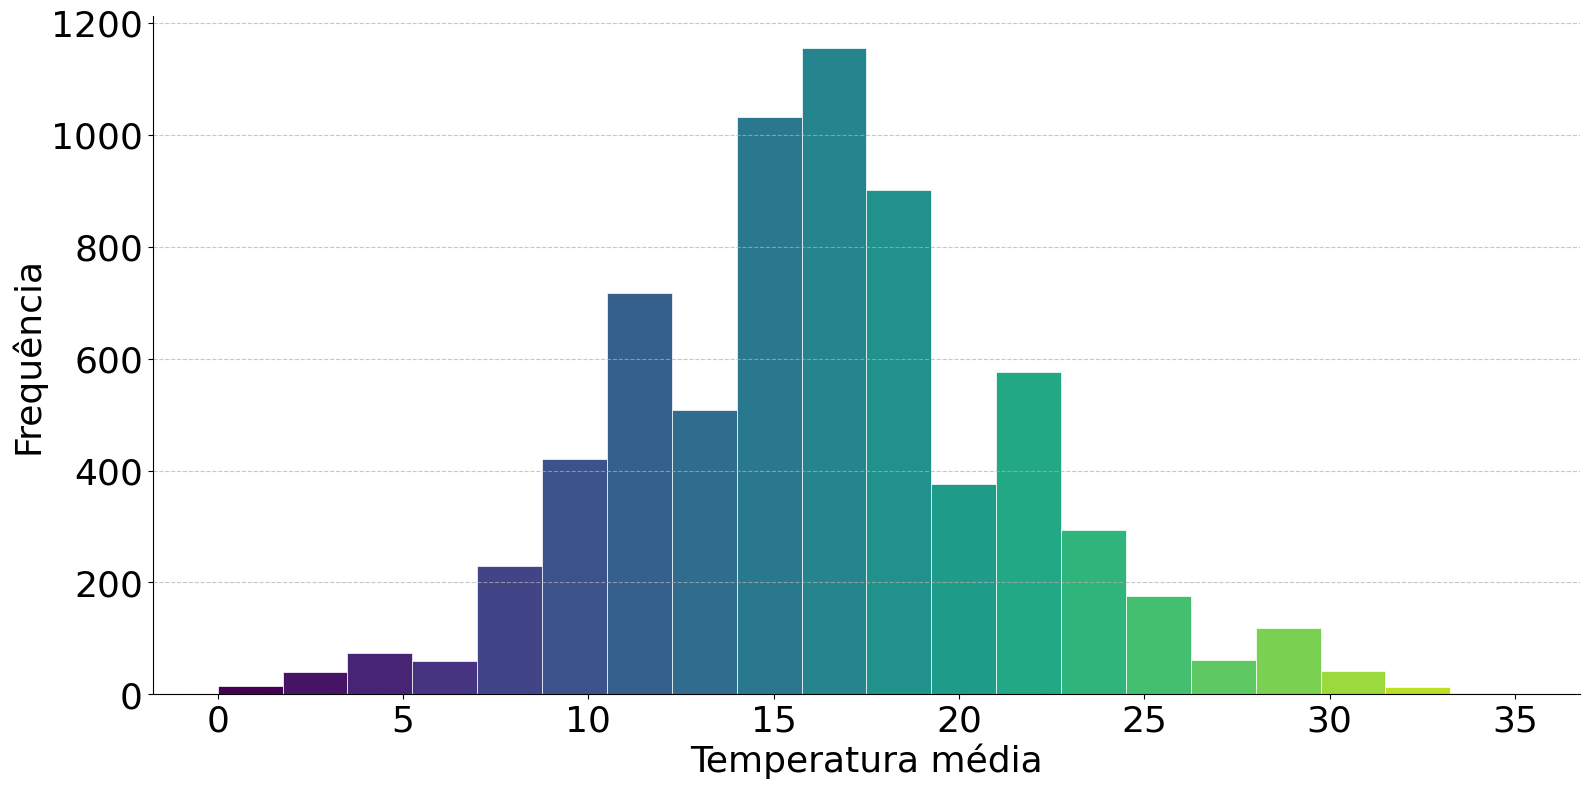

In [18]:

# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_TEMPERATURE', data=train, bins=20)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Temperatura média', size=26)
plt.ylabel('Frequência', size=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [19]:
media = train['AVERAGE_TEMPERATURE'].mean()
mediana = train['AVERAGE_TEMPERATURE'].median()
moda = train['AVERAGE_TEMPERATURE'].mode()[0]
desvio_padrao = train['AVERAGE_TEMPERATURE'].std()
variancia = train['AVERAGE_TEMPERATURE'].var()
maximo = train['AVERAGE_TEMPERATURE'].max()
minimo = train['AVERAGE_TEMPERATURE'].min()
interquartil = train['AVERAGE_TEMPERATURE'].quantile(0.75) - train['AVERAGE_TEMPERATURE'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_TEMPERATURE'].kurtosis()
skewness = train['AVERAGE_TEMPERATURE'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')

Média: 16.193482090428656
Mediana: 16.0
Moda: 17.0
Desvio Padrão: 5.1634919281631175
Variância: 26.66164889220567
Máximo: 35.0
Mínimo: 0.0
Intervalo Interquartil: 6.0
Curtose: 0.286518504630612
Assimetria: 0.18183281232109305


##### **Average Humidity**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\782498481.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


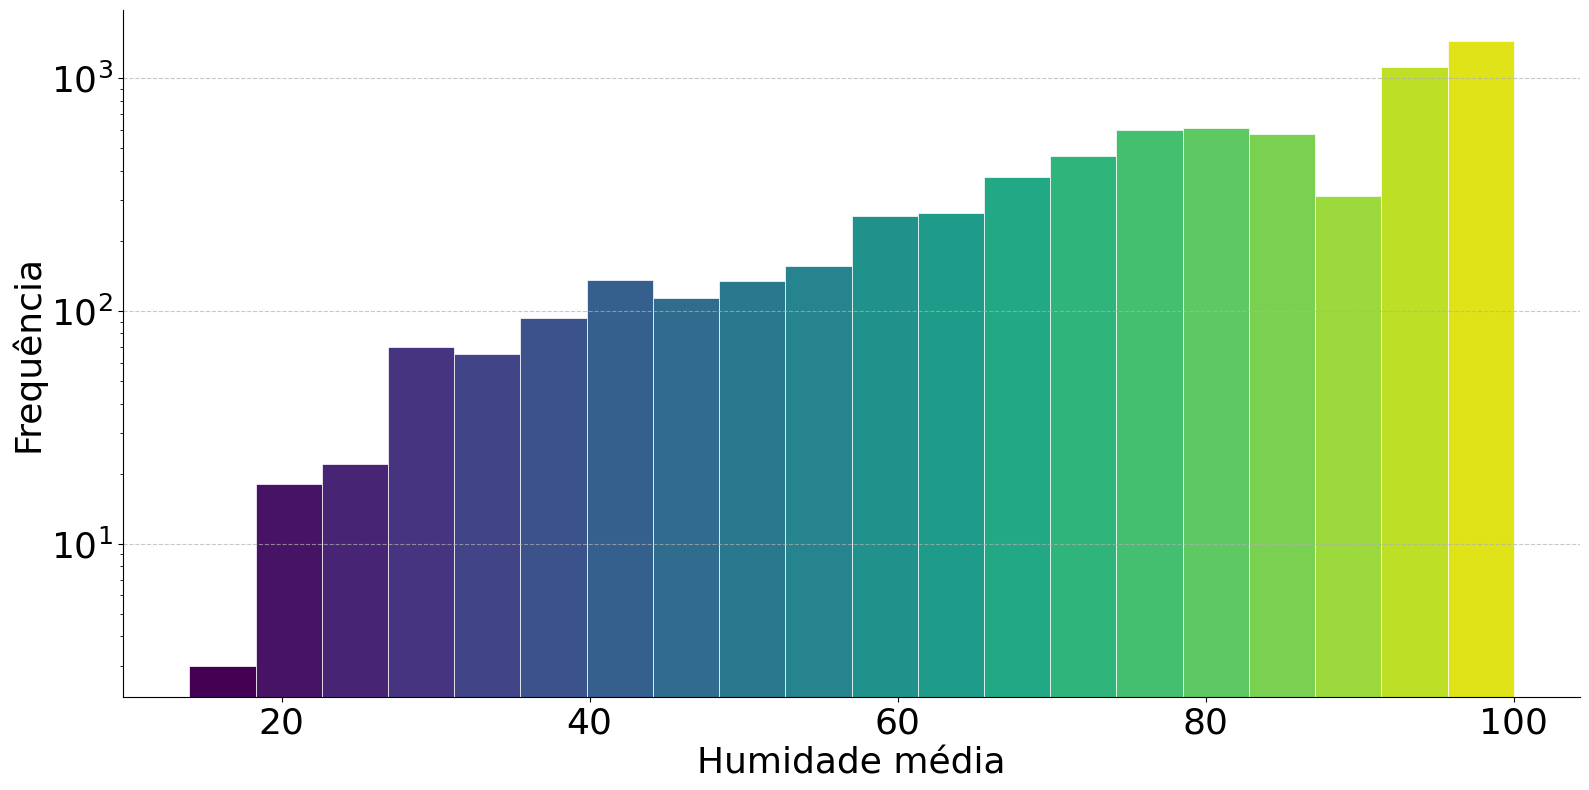

In [20]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_HUMIDITY', data=train, bins=20)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Humidade média', size=26)
plt.ylabel('Frequência', size=26)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [21]:
media = train['AVERAGE_HUMIDITY'].mean()
mediana = train['AVERAGE_HUMIDITY'].median()
moda = train['AVERAGE_HUMIDITY'].mode()[0]
desvio_padrao = train['AVERAGE_HUMIDITY'].std()
variancia = train['AVERAGE_HUMIDITY'].var()
maximo = train['AVERAGE_HUMIDITY'].max()
minimo = train['AVERAGE_HUMIDITY'].min()
interquartil = train['AVERAGE_HUMIDITY'].quantile(0.75) - train['AVERAGE_HUMIDITY'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_HUMIDITY'].kurtosis()
skewness = train['AVERAGE_HUMIDITY'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')

Média: 80.08418966529653
Mediana: 83.0
Moda: 100.0
Desvio Padrão: 18.2388634421224
Variância: 332.65613966038904
Máximo: 100.0
Mínimo: 14.0
Intervalo Interquartil: 23.25
Curtose: 0.3497493709599926
Assimetria: -0.9659999200206433


##### **Average Wind Speed**

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\1346842449.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


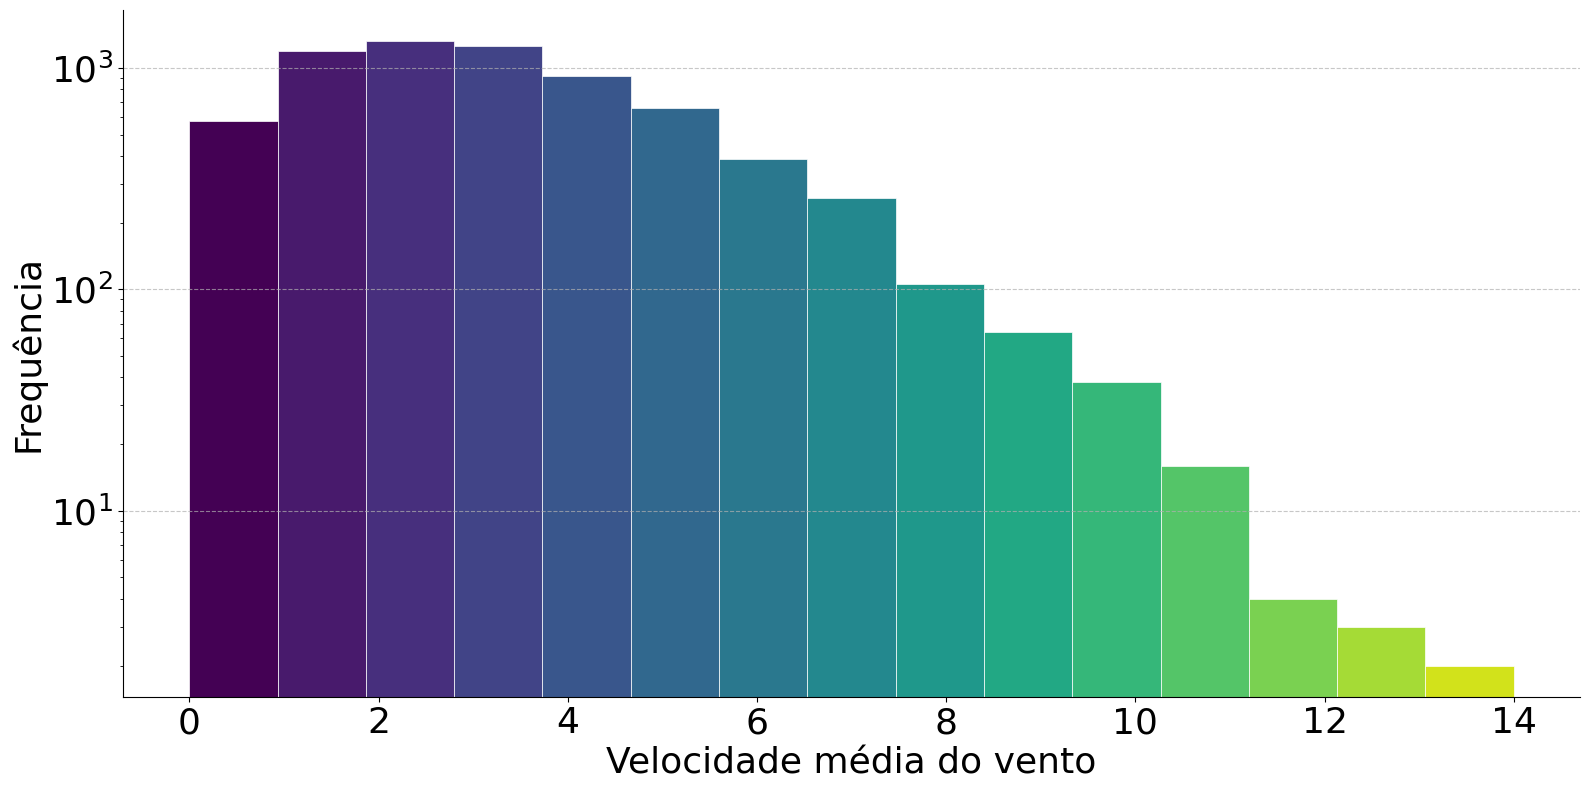

In [22]:
# Configuração do estilo
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='AVERAGE_WIND_SPEED', data=train, bins=15)
cm = plt.cm.get_cmap('viridis') 
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])

for i, p in enumerate(ax.patches):
    color = cm(i / n_bins) 
    p.set_facecolor(color)
    p.set_edgecolor('white') 
    p.set_linewidth(0.5)

# Personalização dos eixos
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Velocidade média do vento', size=26)
plt.ylabel('Frequência', size=26)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

In [23]:
media = train['AVERAGE_WIND_SPEED'].mean()
mediana = train['AVERAGE_WIND_SPEED'].median()
moda = train['AVERAGE_WIND_SPEED'].mode()[0]
desvio_padrao = train['AVERAGE_WIND_SPEED'].std()
variancia = train['AVERAGE_WIND_SPEED'].var()
maximo = train['AVERAGE_WIND_SPEED'].max()
minimo = train['AVERAGE_WIND_SPEED'].min()
interquartil = train['AVERAGE_WIND_SPEED'].quantile(0.75) - train['AVERAGE_WIND_SPEED'].quantile(0.25)
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')
print(f'Desvio Padrão: {desvio_padrao}')
print(f'Variância: {variancia}')
print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')
print(f'Intervalo Interquartil: {interquartil}')
kurtosis = train['AVERAGE_WIND_SPEED'].kurtosis()
skewness = train['AVERAGE_WIND_SPEED'].skew()
print(f'Curtose: {kurtosis}')
print(f'Assimetria: {skewness}')

Média: 3.05857310628303
Mediana: 3.0
Moda: 2.0
Desvio Padrão: 2.138420529840178
Variância: 4.572842362441947
Máximo: 14.0
Mínimo: 0.0
Intervalo Interquartil: 3.0
Curtose: 0.8870753085026761
Assimetria: 0.8734786776888487


##### **Luminosity**

In [24]:
train['LUMINOSITY'].value_counts()

LUMINOSITY
LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: count, dtype: int64

In [25]:
# Mapeamento da coluna LUMINOSITY , one hot encoding
train['LUMINOSITY'] = train['LUMINOSITY'].map({'LIGHT': 0, 'LOW_LIGHT': 1, 'DARK': 2})
test['LUMINOSITY'] = test['LUMINOSITY'].map({'LIGHT': 0, 'LOW_LIGHT': 1, 'DARK': 2})

##### **Record Date**

In [26]:
# record_date, uma data/hora (timestamp) como "2018-07-24 00:00:00" não é útil para um modelo. Se transformarmos em feutures numéricas, pode ser melhor para o modelo entender. Podemos extrair dia da semana, mês, hora do dia, etc.
train['record_date'] = pd.to_datetime(train['record_date'])
train['week'] = train['record_date'].dt.isocalendar().week
train['year'] = train['record_date'].dt.year
train['dayofweek'] = train['record_date'].dt.dayofweek
train['month'] = train['record_date'].dt.month
train['dayofyear'] = train['record_date'].dt.dayofyear
train['hour'] = train['record_date'].dt.hour
train['hour_sin'] = np.sin(2 * np.pi * train['hour'] / 24)
train['hour_cos'] = np.cos(2 * np.pi * train['hour'] / 24)
test['record_date'] = pd.to_datetime(test['record_date'])
test['year'] = test['record_date'].dt.year
test['week'] = test['record_date'].dt.isocalendar().week
test['dayofweek'] = test['record_date'].dt.dayofweek
test['month'] = test['record_date'].dt.month
test['dayofyear'] = test['record_date'].dt.dayofyear
test['hour'] = test['record_date'].dt.hour
test['hour_sin'] = np.sin(2 * np.pi * test['hour'] / 24)
test['hour_cos'] = np.cos(2 * np.pi * test['hour'] / 24)

C:\Users\Luimp\AppData\Local\Temp\ipykernel_6392\834142957.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('viridis')


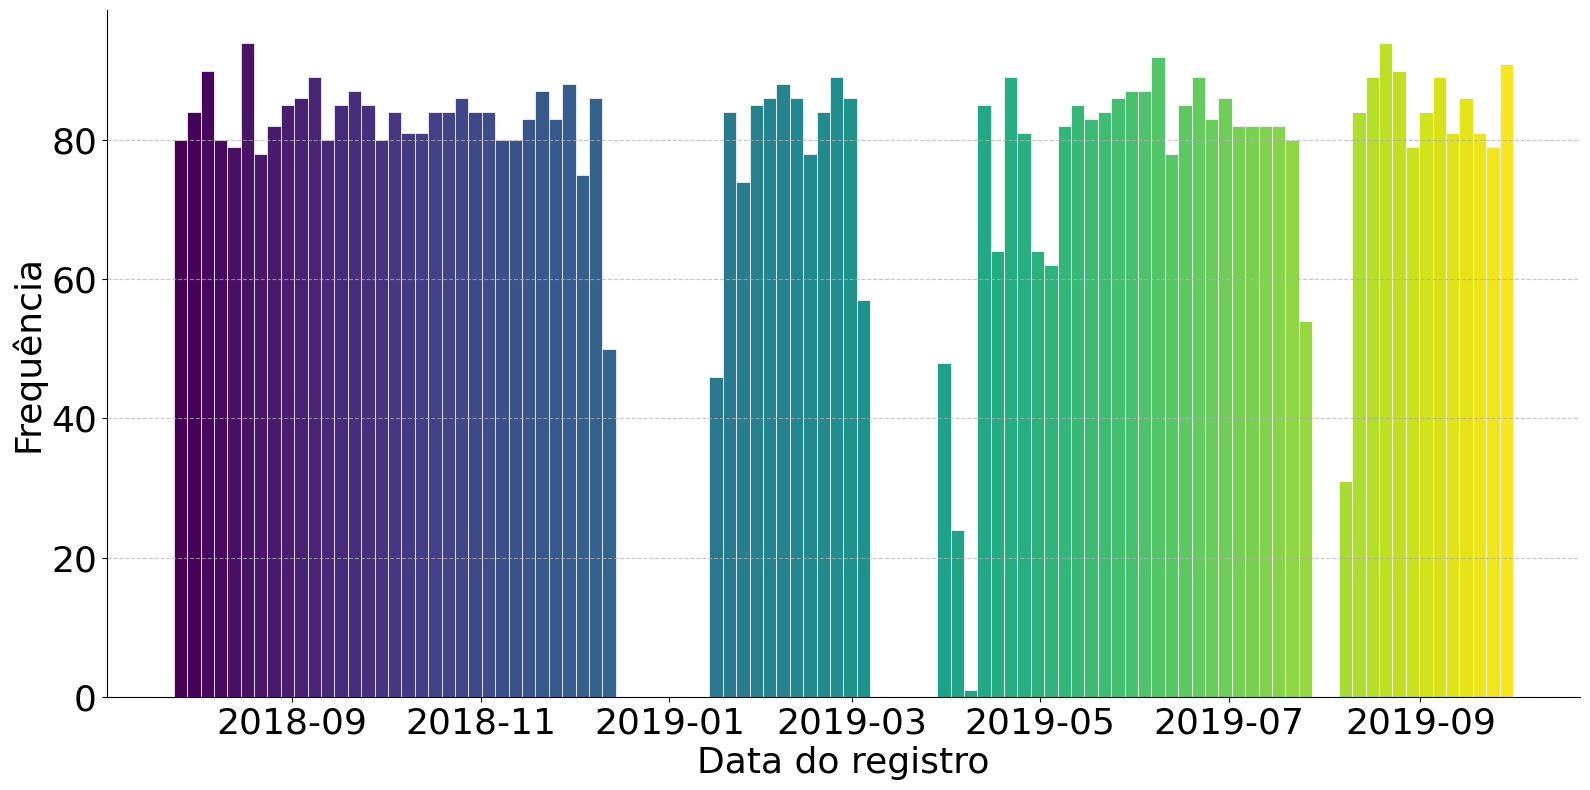

In [27]:
# Mostrar distribuição para verificar continuidade temporal
plt.figure(figsize=(16, 8))
ax = sns.histplot(x='record_date', data=train, bins=100)
cm = plt.cm.get_cmap('viridis')
n_bins = len(ax.patches)
max_val = max([p.get_height() for p in ax.patches])
for i, p in enumerate(ax.patches):
    color = cm(i / n_bins)
    p.set_facecolor(color)
    p.set_edgecolor('white')
    p.set_linewidth(0.5)
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.xlabel('Data do registro', size=26)
plt.ylabel('Frequência', size=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

##### **Average Cloudiness**

In [28]:
train['AVERAGE_CLOUDINESS'].value_counts()

AVERAGE_CLOUDINESS
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: count, dtype: int64

##### **Average Rain**

In [29]:
train['AVERAGE_RAIN'].value_counts()

AVERAGE_RAIN
chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1
Name: count, dtype: int64

#### **Multivariate**

##### **Missing Values**

###### **Analysis**

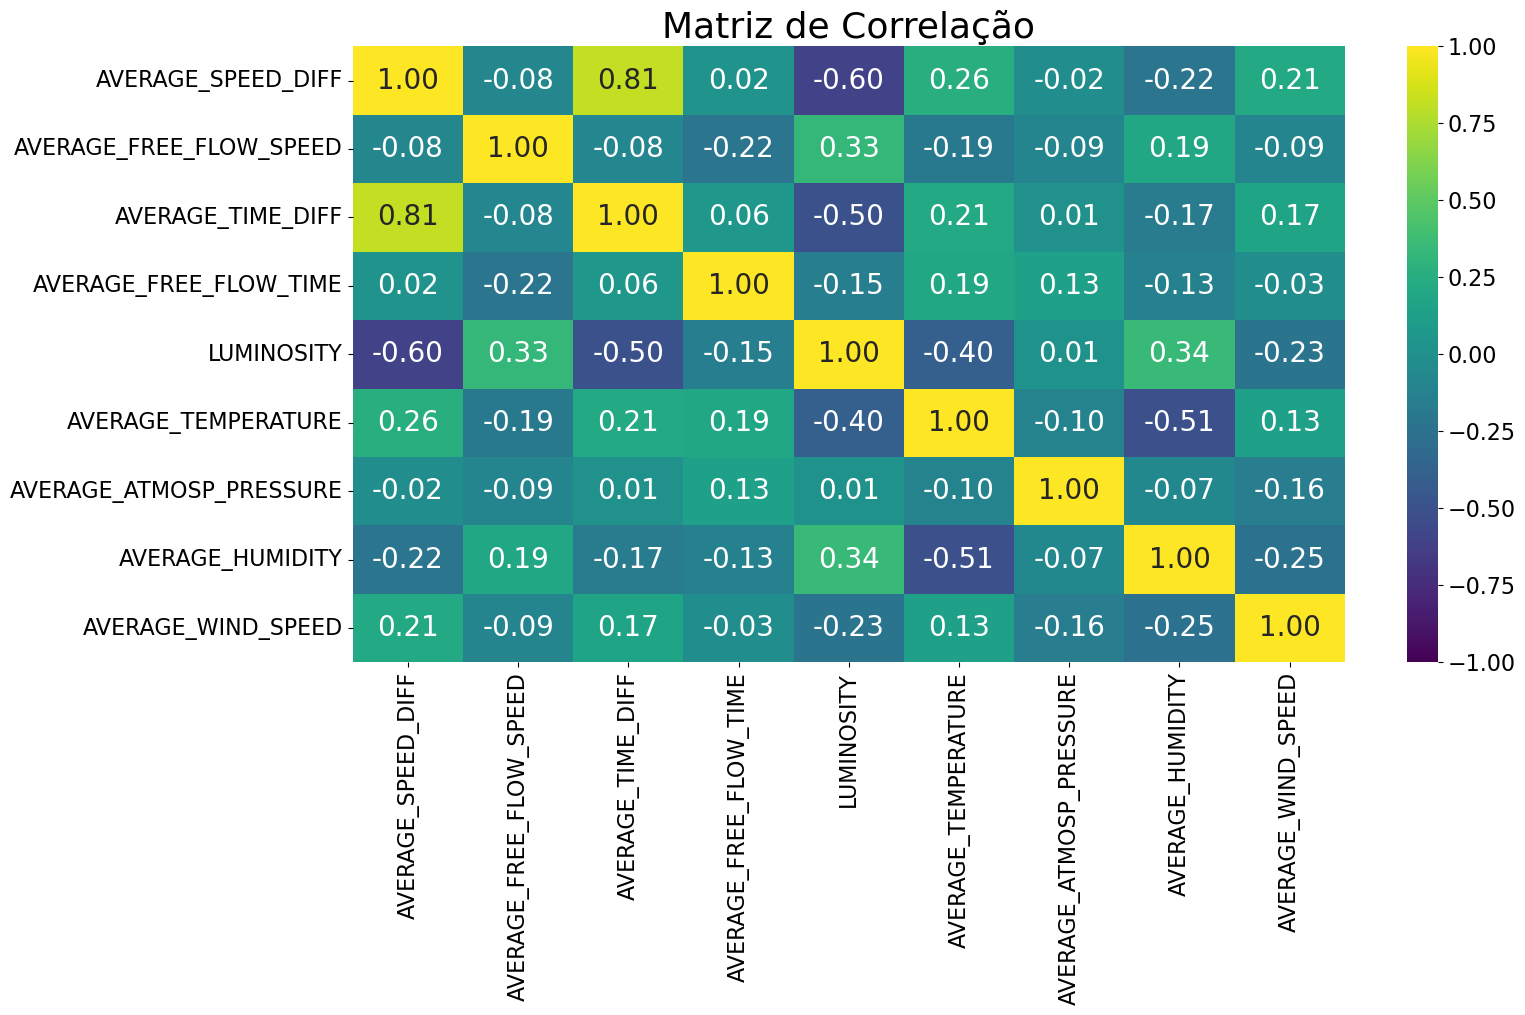

In [30]:
plt.figure(figsize=(16,8))
correlation_matrix = train.drop(columns=['week', 'year', 'dayofweek', 'month', 'dayofyear', 'hour', 'hour_sin', 'hour_cos']).corr(numeric_only=True)
ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1, annot_kws={'size': 20})
ax.tick_params(axis='x', labelsize=16)  # Altera o tamanho da fonte do eixo X
ax.tick_params(axis='y', labelsize=16)  # Altera o tamanho da fonte do eixo Y
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
plt.title('Matriz de Correlação', size=26)
plt.show()

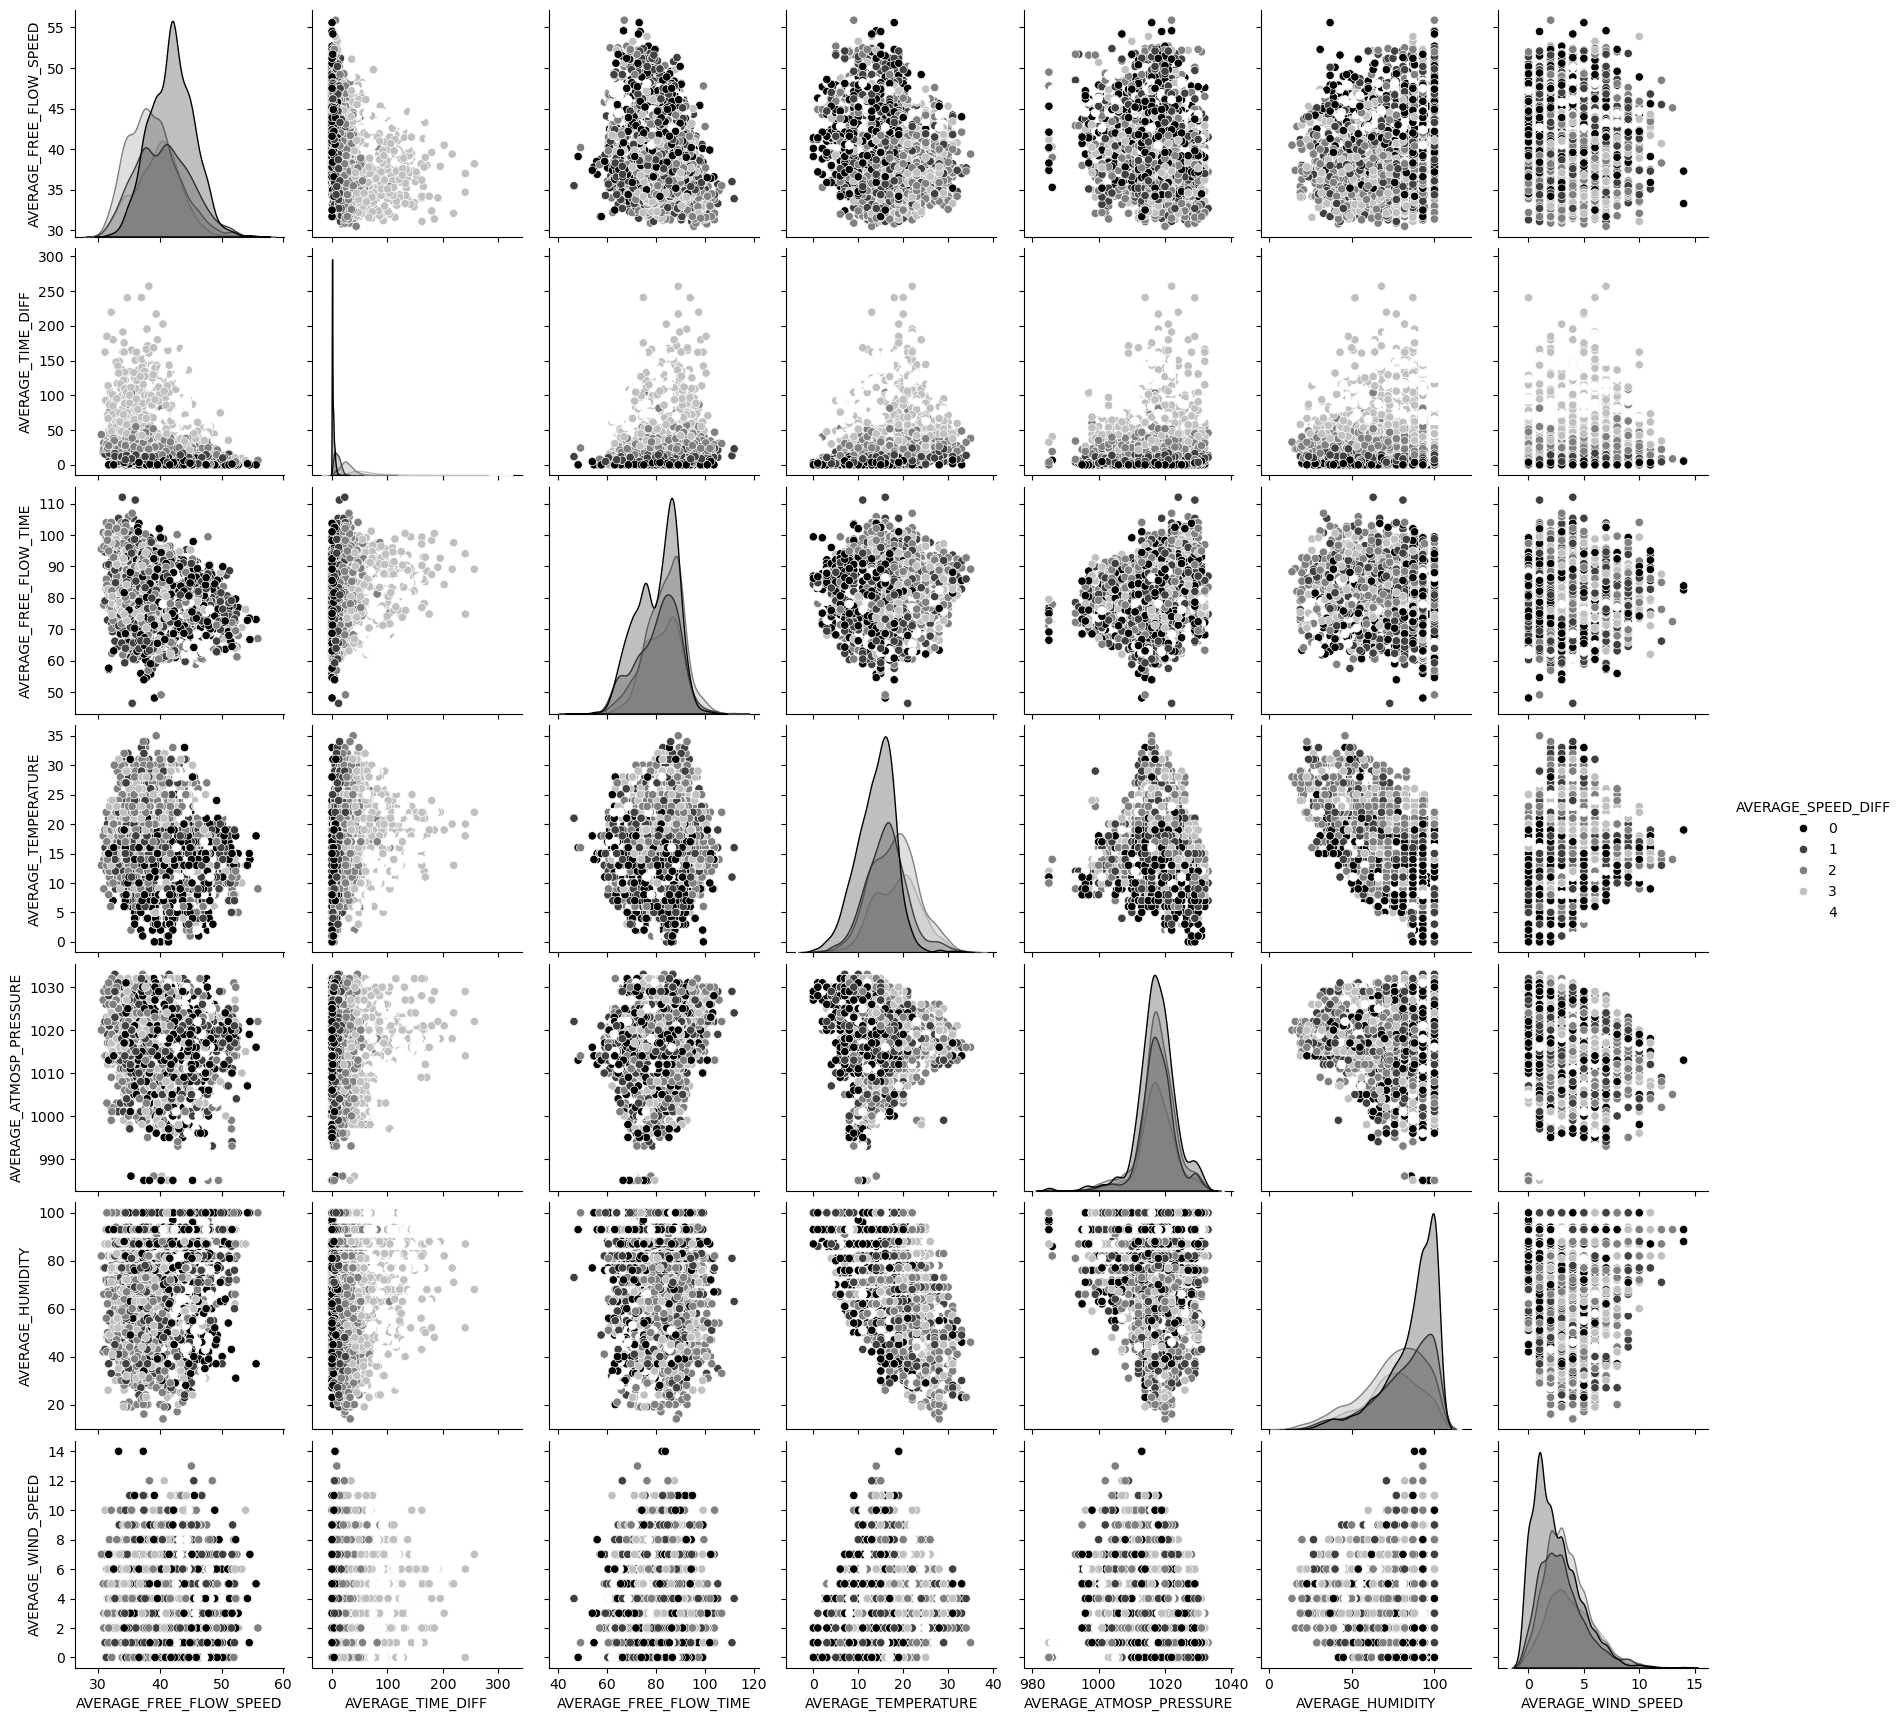

In [31]:
# Análise multivariavel
sns.pairplot(train.drop(columns=['week', 'year', 'dayofweek', 'month', 'dayofyear', 'hour', 'hour_sin', 'hour_cos', 'LUMINOSITY']), hue='AVERAGE_SPEED_DIFF', palette='gray')

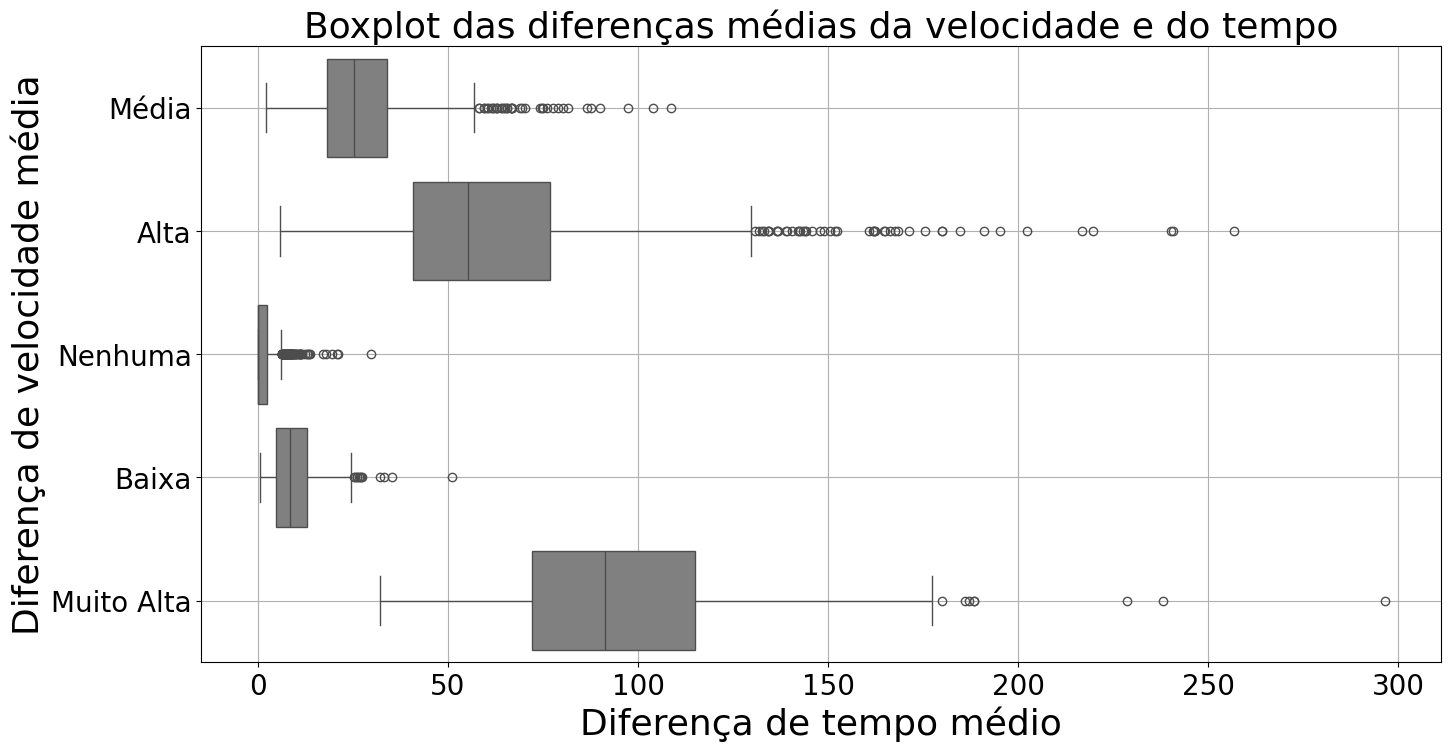

In [32]:
plt.figure(figsize=(16, 8))
average_speed_diff = {0: 'Nenhuma', 1: 'Baixa', 2: 'Média', 3: 'Alta', 4: 'Muito Alta'}
c = train.copy()
c['AVERAGE_SPEED_DIFF'] = c['AVERAGE_SPEED_DIFF'].map(average_speed_diff)
sns.boxplot(x='AVERAGE_TIME_DIFF', y='AVERAGE_SPEED_DIFF', data=c, color='gray')
plt.title('Boxplot das diferenças médias da velocidade e do tempo', size=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Diferença de tempo médio', size=26)
plt.ylabel('Diferença de velocidade média', size=26)
plt.grid()
plt.show()

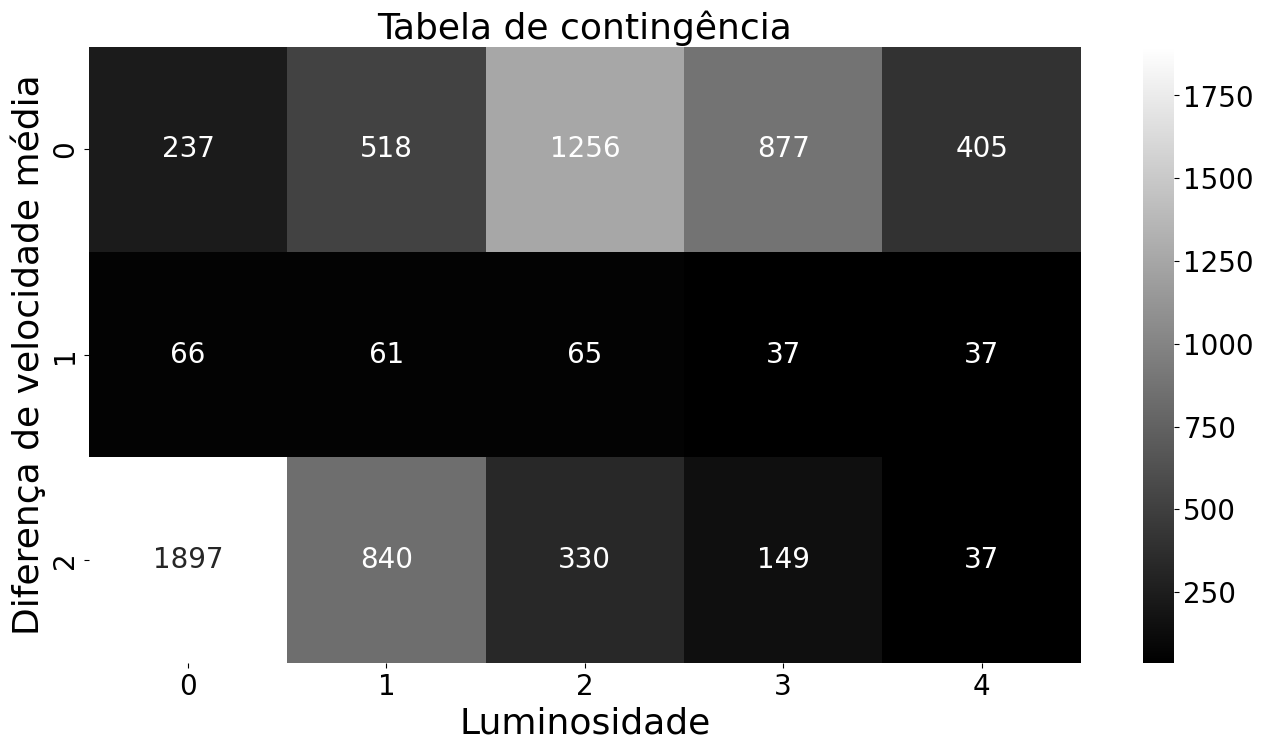

In [33]:
plt.figure(figsize=(16, 8))
M = pd.crosstab(train['LUMINOSITY'], train['AVERAGE_SPEED_DIFF'])
ax = sns.heatmap(M, annot=True, fmt='d', cmap='gray', annot_kws={'size': 20})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tabela de contingência', size=26)
plt.xlabel('Luminosidade', size=26)
plt.ylabel('Diferença de velocidade média', size=26)
plt.show()

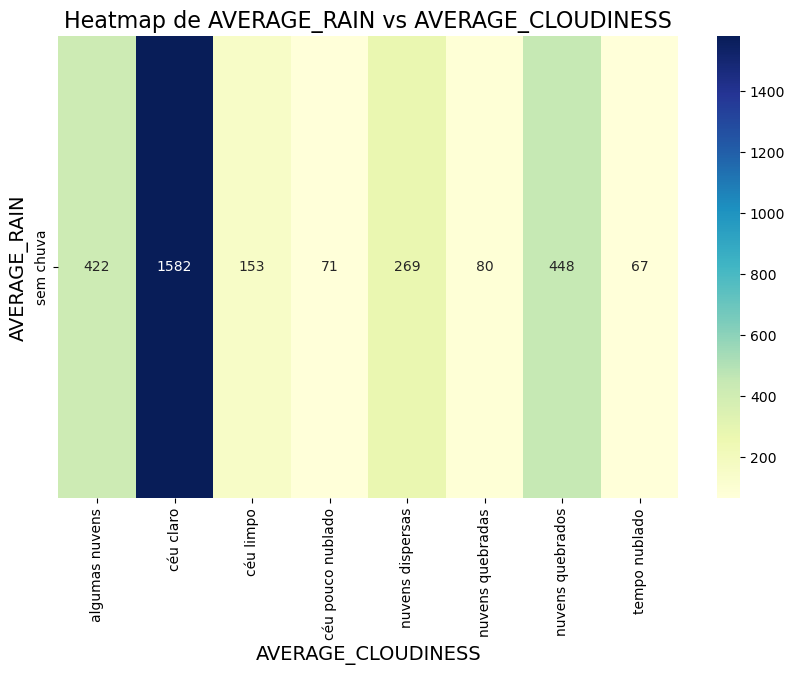

In [34]:
test['AVERAGE_RAIN'] = pd.read_excel(r'../datasets/test_data1.xlsx', engine='openpyxl')['AVERAGE_RAIN']
train['AVERAGE_RAIN'] = pd.read_excel(r'../datasets/training_data1.xlsx', engine='openpyxl')['AVERAGE_RAIN']
plt.figure(figsize=(10, 6))
rain_cloudiness_ct = pd.crosstab(train['AVERAGE_RAIN'], train['AVERAGE_CLOUDINESS'])
sns.heatmap(rain_cloudiness_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap de AVERAGE_RAIN vs AVERAGE_CLOUDINESS', size=16)
plt.xlabel('AVERAGE_CLOUDINESS', size=14)
plt.ylabel('AVERAGE_RAIN', size=14)
plt.show()

In [35]:
test['AVERAGE_RAIN'] = pd.read_excel(r'../datasets/test_data1.xlsx', engine='openpyxl')['AVERAGE_RAIN']
train['AVERAGE_RAIN'] = pd.read_excel(r'../datasets/training_data1.xlsx', engine='openpyxl')['AVERAGE_RAIN']
#test['AVERAGE_RAIN'] = pd.read_csv(r'../datasets/test_data.csv', encoding='latin1')['AVERAGE_RAIN']
#train['AVERAGE_RAIN'] = pd.read_csv(r'../datasets/training_data.csv', encoding='latin1')['AVERAGE_RAIN']

###### **Binning**

In [36]:
# Variaveis Categoricas muito semelhantes podem ser agrupadas
train['AVERAGE_CLOUDINESS'] = train['AVERAGE_CLOUDINESS'].map({'céu limpo': 0,
                                                            'céu claro': 0,
                                                            'nuvens dispersas': 1,
                                                            'algumas nuvens': 1,
                                                            'nuvens quebradas': 1,
                                                            'nuvens quebrados': 1,
                                                            'céu pouco nublado': 2,
                                                            'nublado': 2,
                                                            'tempo nublado': 2
                                                            })
test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].map({'céu limpo': 0,
                                                            'céu claro': 0,
                                                            'nuvens dispersas': 1,
                                                            'algumas nuvens': 1,
                                                            'nuvens quebradas': 1,
                                                            'nuvens quebrados': 1,
                                                            'céu pouco nublado': 2,
                                                            'nublado': 2,
                                                            'tempo nublado': 2
                                                            })

In [37]:
train['AVERAGE_RAIN'] = train['AVERAGE_RAIN'].map({
    'sem chuva': 0,
    'aguaceiros fracos': 1,
    'chuvisco fraco': 1, 
    'chuvisco e chuva fraca': 1,
    'chuva fraca': 1,
    'chuva leve': 1,
    'trovoada com chuva leve': 1,
    'aguaceiros': 1,
    'chuva': 1,
    'trovoada com chuva': 1,
    'chuva moderada': 1,
    'chuva forte': 1,
    'chuva de intensidade pesada': 1,
    'chuva de intensidade pesado': 1,
})
test['AVERAGE_RAIN'] = test['AVERAGE_RAIN'].map({
    'sem chuva': 0,
    'aguaceiros fracos': 1,
    'chuvisco fraco': 1, 
    'chuvisco e chuva fraca': 1,
    'chuva fraca': 1,
    'chuva leve': 1,
    'trovoada com chuva leve': 1,
    'aguaceiros': 1,
    'chuva': 1,
    'trovoada com chuva': 1,
    'chuva moderada': 1,
    'chuva forte': 1,
    'chuva de intensidade pesada': 1,
    'chuva de intensidade pesado': 1,
})

###### **Fill In**

In [38]:

train['record_date'] = pd.to_datetime(train['record_date'])
test['record_date'] = pd.to_datetime(test['record_date'])

train = train.sort_values(by='record_date')
train['AVERAGE_RAIN'] = train['AVERAGE_RAIN'].ffill()
train['AVERAGE_CLOUDINESS'] = train['AVERAGE_CLOUDINESS'].ffill()

train = train.sort_index()

test = test.sort_values(by='record_date')

test['AVERAGE_RAIN'] = test['AVERAGE_RAIN'].ffill()
test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].ffill()

test = test.sort_index()

test['AVERAGE_RAIN'] = test['AVERAGE_RAIN'].bfill()
test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].bfill()

In [39]:
train = train.drop(columns=['record_date'])
test = test.drop(columns=['record_date'])

In [40]:
"""
for index, row in train.iterrows():
    rain = row['AVERAGE_CLOUDINESS']
    if pd.isnull(rain):
        dayofweek = row['dayofweek']
        month = row['month']
        most_frequent = train[train['dayofweek'] == dayofweek]['AVERAGE_CLOUDINESS'].mode()
        if not most_frequent.empty:
            train.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]
        else:
            most_frequent = train[train['month'] == month]['AVERAGE_CLOUDINESS'].mode()
            if not most_frequent.empty:
                train.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]
            else:
                overall_most_frequent = train['AVERAGE_CLOUDINESS'].mode()
                if not overall_most_frequent.empty:
                    train.at[index, 'AVERAGE_CLOUDINESS'] = overall_most_frequent[0]
for index, row in test.iterrows():
    rain = row['AVERAGE_CLOUDINESS']
    if pd.isnull(rain):
        dayofweek = row['dayofweek']
        month = row['month']
        most_frequent = test[test['dayofweek'] == dayofweek]['AVERAGE_CLOUDINESS'].mode()
        if not most_frequent.empty:
            test.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]
        else:
            most_frequent = test[test['month'] == month]['AVERAGE_CLOUDINESS'].mode()
            if not most_frequent.empty:
                test.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]
            else:
                overall_most_frequent = test['AVERAGE_CLOUDINESS'].mode()
                if not overall_most_frequent.empty:
                    test.at[index, 'AVERAGE_CLOUDINESS'] = overall_most_frequent[0]

for index, row in train.iterrows():
    rain = row['AVERAGE_RAIN']
    if pd.isnull(rain):
        dayofweek = row['dayofweek']
        month = row['month']
        most_frequent = train[train['dayofweek'] == dayofweek]['AVERAGE_RAIN'].mode()
        if not most_frequent.empty:
            train.at[index, 'AVERAGE_RAIN'] = most_frequent[0]
        else:
            most_frequent = train[train['month'] == month]['AVERAGE_RAIN'].mode()
            if not most_frequent.empty:
                train.at[index, 'AVERAGE_RAIN'] = most_frequent[0]
            else:
                overall_most_frequent = train['AVERAGE_RAIN'].mode()
                if not overall_most_frequent.empty:
                    train.at[index, 'AVERAGE_RAIN'] = overall_most_frequent[0]
for index, row in test.iterrows():
    rain = row['AVERAGE_RAIN']
    if pd.isnull(rain):
        dayofweek = row['dayofweek']
        month = row['month']
        most_frequent = test[test['dayofweek'] == dayofweek]['AVERAGE_RAIN'].mode()
        if not most_frequent.empty:
            test.at[index, 'AVERAGE_RAIN'] = most_frequent[0]
        else:
            most_frequent = test[test['month'] == month]['AVERAGE_RAIN'].mode()
            if not most_frequent.empty:
                test.at[index, 'AVERAGE_RAIN'] = most_frequent[0]
            else:
                overall_most_frequent = test['AVERAGE_RAIN'].mode()
                if not overall_most_frequent.empty:
                    test.at[index, 'AVERAGE_RAIN'] = overall_most_frequent[0]"""

"\nfor index, row in train.iterrows():\n    rain = row['AVERAGE_CLOUDINESS']\n    if pd.isnull(rain):\n        dayofweek = row['dayofweek']\n        month = row['month']\n        most_frequent = train[train['dayofweek'] == dayofweek]['AVERAGE_CLOUDINESS'].mode()\n        if not most_frequent.empty:\n            train.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]\n        else:\n            most_frequent = train[train['month'] == month]['AVERAGE_CLOUDINESS'].mode()\n            if not most_frequent.empty:\n                train.at[index, 'AVERAGE_CLOUDINESS'] = most_frequent[0]\n            else:\n                overall_most_frequent = train['AVERAGE_CLOUDINESS'].mode()\n                if not overall_most_frequent.empty:\n                    train.at[index, 'AVERAGE_CLOUDINESS'] = overall_most_frequent[0]\nfor index, row in test.iterrows():\n    rain = row['AVERAGE_CLOUDINESS']\n    if pd.isnull(rain):\n        dayofweek = row['dayofweek']\n        month = row['month']\n        m

In [41]:
"""
features = ['AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_FREE_FLOW_TIME',
            'AVERAGE_TIME_DIFF', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_TEMPERATURE',
            'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED', 'LUMINOSITY', 'week',
            'dayofweek', 'dayofyear', "hour_sin", "hour_cos"]

# Preencher AVERAGE_CLOUDINESS
train_cloudiness = train[train['AVERAGE_CLOUDINESS'].notnull()]
X_cloudiness = train_cloudiness[features]
y_cloudiness = train_cloudiness['AVERAGE_CLOUDINESS']

# Split para validação
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_cloudiness, y_cloudiness, test_size=0.2, random_state=2025)

reg_cloudiness = RandomForestClassifier(random_state=2025)
reg_cloudiness.fit(X_train_val, y_train_val)

# Análise estatistica
y_pred_val = reg_cloudiness.predict(X_test_val)
print('Matriz Confusão:')
print(confusion_matrix(y_test_val, y_pred_val))
print('\n')
print('Relatório de Classificação:')
print(classification_report(y_test_val, y_pred_val))

# Treinar com todos os dados para preencher valores faltantes
reg_cloudiness.fit(X_cloudiness, y_cloudiness)

# Preencher valores faltantes em train
missing_cloudiness_train = train[train['AVERAGE_CLOUDINESS'].isnull()]
X_missing_cloudiness_train = missing_cloudiness_train[features]
predicted_cloudiness_train = reg_cloudiness.predict(X_missing_cloudiness_train)
train.loc[train['AVERAGE_CLOUDINESS'].isnull(), 'AVERAGE_CLOUDINESS'] = predicted_cloudiness_train

# Preencher valores faltantes em test
missing_cloudiness_test = test[test['AVERAGE_CLOUDINESS'].isnull()]
X_missing_cloudiness_test = missing_cloudiness_test[features]
predicted_cloudiness_test = reg_cloudiness.predict(X_missing_cloudiness_test)
test.loc[test['AVERAGE_CLOUDINESS'].isnull(), 'AVERAGE_CLOUDINESS'] = predicted_cloudiness_test

features = [ 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_TEMPERATURE',
            'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED', 'week', 'dayofyear', "hour_sin", "hour_cos", 'AVERAGE_CLOUDINESS', 'year', 'month']

# Preencher AVERAGE_CLOUDINESS
train_rain = train[train['AVERAGE_RAIN'].notnull()]
X_rain = train_rain[features]
y_rain = train_rain['AVERAGE_RAIN']

# Split para validação
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_rain, y_rain, test_size=0.2, random_state=2025)

reg_rain = RandomForestClassifier(random_state=2025)
reg_rain.fit(X_train_val, y_train_val)

# Análise estatistica
y_pred_val = reg_rain.predict(X_test_val)
print('Matriz Confusão:')
print(confusion_matrix(y_test_val, y_pred_val))
print('\n')
print('Relatório de Classificação:')
print(classification_report(y_test_val, y_pred_val))

# Treinar com todos os dados para preencher valores faltantes
reg_rain.fit(X_rain, y_rain)

# Preencher valores faltantes em train
missing_rain_train = train[train['AVERAGE_RAIN'].isnull()]
X_missing_rain_train = missing_rain_train[features]
predicted_rain_train = reg_rain.predict(X_missing_rain_train)
train.loc[train['AVERAGE_RAIN'].isnull(), 'AVERAGE_RAIN'] = predicted_rain_train

# Preencher valores faltantes em test
missing_rain_test = test[test['AVERAGE_RAIN'].isnull()]
X_missing_rain_test = missing_rain_test[features]
predicted_rain_test = reg_rain.predict(X_missing_rain_test)
test.loc[test['AVERAGE_RAIN'].isnull(), 'AVERAGE_RAIN'] = predicted_rain_test

# Verificar se ainda existem valores nulos
print("\n")
print("Valores nulos após preenchimento:")
print(train['AVERAGE_RAIN'].isnull().sum()+ test['AVERAGE_RAIN'].isnull().sum())"""

'\nfeatures = [\'AVERAGE_FREE_FLOW_SPEED\', \'AVERAGE_FREE_FLOW_TIME\',\n            \'AVERAGE_TIME_DIFF\', \'AVERAGE_ATMOSP_PRESSURE\', \'AVERAGE_TEMPERATURE\',\n            \'AVERAGE_HUMIDITY\', \'AVERAGE_WIND_SPEED\', \'LUMINOSITY\', \'week\',\n            \'dayofweek\', \'dayofyear\', "hour_sin", "hour_cos"]\n\n# Preencher AVERAGE_CLOUDINESS\ntrain_cloudiness = train[train[\'AVERAGE_CLOUDINESS\'].notnull()]\nX_cloudiness = train_cloudiness[features]\ny_cloudiness = train_cloudiness[\'AVERAGE_CLOUDINESS\']\n\n# Split para validação\nX_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_cloudiness, y_cloudiness, test_size=0.2, random_state=2025)\n\nreg_cloudiness = RandomForestClassifier(random_state=2025)\nreg_cloudiness.fit(X_train_val, y_train_val)\n\n# Análise estatistica\ny_pred_val = reg_cloudiness.predict(X_test_val)\nprint(\'Matriz Confusão:\')\nprint(confusion_matrix(y_test_val, y_pred_val))\nprint(\'\n\')\nprint(\'Relatório de Classificação:\')\nprint(classi

#### **Normalização**

In [42]:
# Normalização dos dados
# Features
features = train.drop(columns=['AVERAGE_SPEED_DIFF']).columns
c = train['AVERAGE_SPEED_DIFF'].copy()

# 1. Inicializar
scaler = MinMaxScaler(feature_range=(0, 1))

# 2. Ajustar e transformar APENAS o treino
# O scaler agora "guarda" os valores min/max do treino na memória
train_scaled = scaler.fit_transform(train[features])

# 3. Transformar o teste usando o que foi aprendido no treino
# Note que usamos apenas .transform(), sem o 'fit'
test_scaled = scaler.transform(test[features])

# 4. Converter de volta para DataFrame
train = pd.DataFrame(train_scaled, columns=features)
train['AVERAGE_SPEED_DIFF'] = c
test = pd.DataFrame(test_scaled, columns=features)

#### **Export Data**

In [43]:
train.to_csv(r'../datasets/training_data_cleaned.csv', index=False)
test.to_csv(r'../datasets/test_data_cleaned.csv', index=False)